![](https://cdn.theatlantic.com/thumbor/npZfAjSjxXVdQoYrvTSm6th1GHY=/584x0:2917x2333/500x500/media/img/mt/2016/01/RTX22DCB/original.jpg)

Welcome to this notebook where I try to segment pictures of various items on a food tray using UNets with an architecture of ResNet34. This is my first time doing segmentation in computer vision so do correct me and give any suggestions in the comments :)

An [article on Medium](https://towardsdatascience.com/fastai-image-segmentation-eacad8543f6f) about the same helped me quite a lot, so do check it out.

# Importing the Libraries:

In [1]:
import numpy as np
import pandas as pd

Importing the FastAI libraries:

In [2]:
from fastai.vision import *
from fastai.metrics import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

# Data Prep:

Down here I am preparing the data to be trained and fastAI's library is quite simplistic to use like, anyone can train a UNet using it and do segmentation.

In [3]:
# Defining the path where my JPG images are stored:
trainpath = "../input/tray-food-segmentation/TrayDataset/TrayDataset/XTrain/"

# Defining the path where the mask PNG images of the images mentioned above are stored:
trainlabel = "../input/tray-food-segmentation/TrayDataset/TrayDataset/yTrain/"

# Taking out the JPG filenames out of the training data folder:
fnames = get_image_files(trainpath)

Below is a function which defines how our data module will find the labels to the images it learns segmentation with. Lambda in layman's language here refers to defining a function with input x.

*trainlabel* refers to the folder path where all the labels are stored.

*x.stem* refers to the image's name while, .PNG is concatenated with it because the mask is not a JPG but a PNG. 

In [6]:
get_y = lambda x: trainlabel + x.stem + '.png' 

Lets take a look at the images and their respective masks:

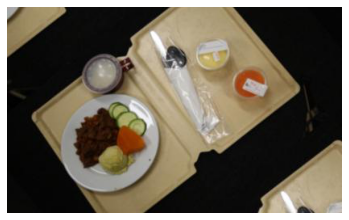

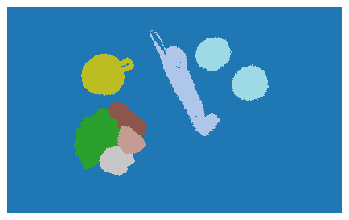

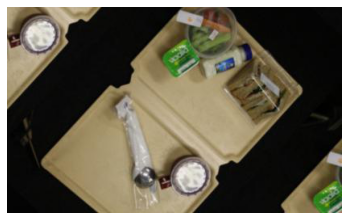

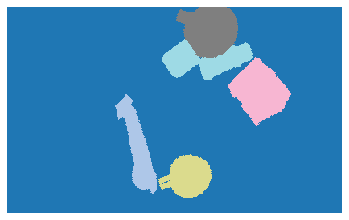

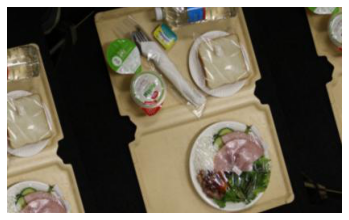

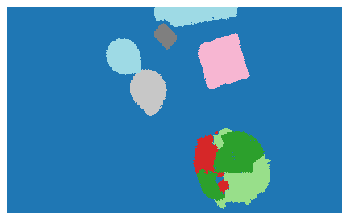

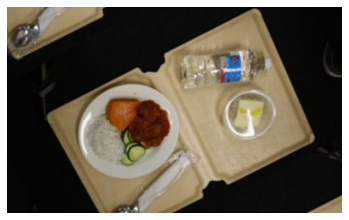

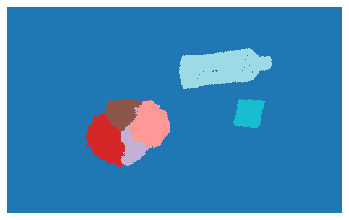

In [7]:
for i in range(0,4):
    img = open_image(fnames[i])
    mask = open_mask(get_y(fnames[i]))
    img.show(figsize=(6,6)), mask.show(figsize=(6,6), alpha=1)

Noting important measures:

In [8]:
src_shape = np.array(mask.shape[1:])

size = src_shape // 2

bs = 4

The classes are stored in a csv so taking a look at it:

In [9]:
classescsv = pd.read_csv("../input/tray-food-segmentation/classes.csv")

classescsv.head()

,_id,_class,_name
0,0,background,background
1,1,tray,tray
2,2,cutlery,cutlery
3,3,form,form
4,4,straw,straw


I will now seperate out the _class since it contains the classes and turn it into a list:

In [10]:
classes = list(classescsv['_class'])

Finally defining the data our model will run on:

In [11]:
src = (SegmentationItemList
       .from_folder(trainpath)
       .split_by_rand_pct(.2)
       .label_from_func(get_y, classes=classes))

In [12]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

Taking a look at an image with its mask:

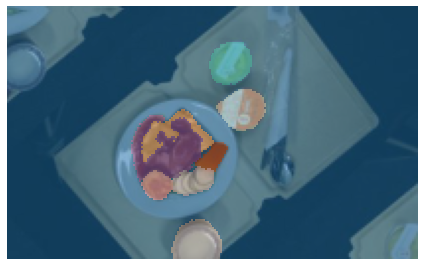

In [13]:
data.show_batch(1, figsize=(6,6))

Defining and downloading the UNet:

In [14]:
learner = unet_learner(data, models.resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


# Training and Predicting:

Training the data:

In [15]:
learner.fit_one_cycle(12)

epoch,train_loss,valid_loss,time
0,0.368539,0.273582,00:27
1,0.422866,0.308537,00:24
2,0.372700,0.368143,00:23
3,0.213122,0.157734,00:23
4,0.160149,0.128482,00:22
5,0.131675,0.129522,00:23
6,0.106345,0.106170,00:24
7,0.079441,0.079502,00:22
8,0.063567,0.076035,00:24
9,0.063638,0.066600,00:23


Since the both the losses seem small enough, lets predict:

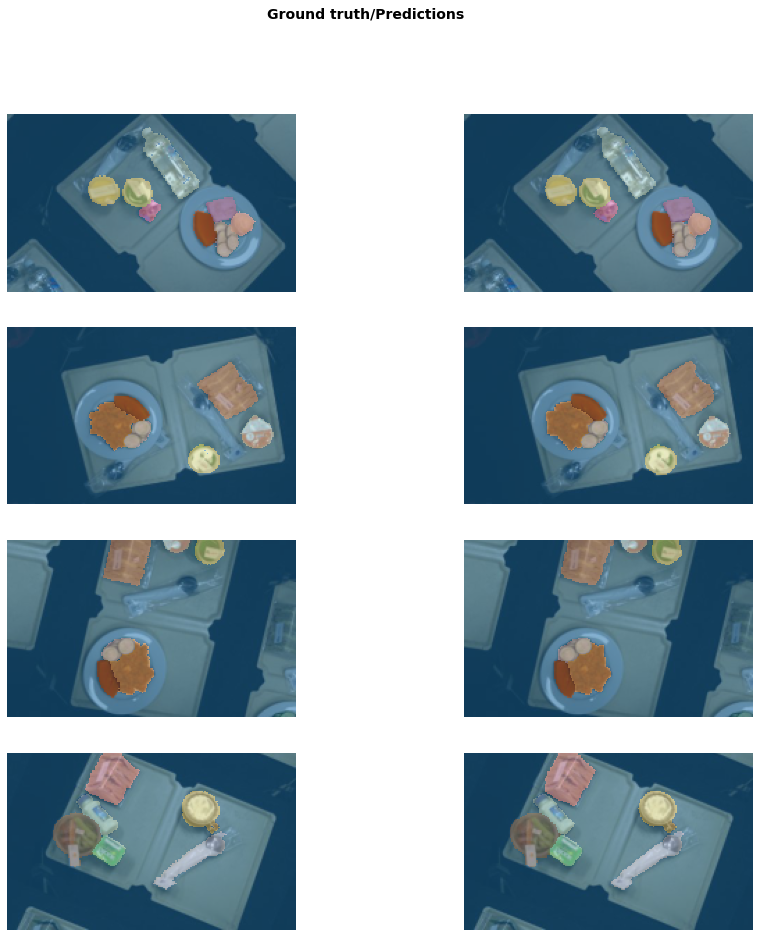

In [22]:
learner.show_results(figsize=(15,15))

On the left is the actual images while on the left is the predictions! They look almost identical and thereby here I conclude this notebook.

If you liked this notebook, an upvote would be of tremendous help as I trot forward with my infatuation with Deep Learning :)